# Non-linear regression

## Example 1: simple equation

Example from John Kitchin: https://kitchingroup.cheme.cmu.edu/blog/2013/02/12/Nonlinear-curve-fitting-with-parameter-confidence-intervals/

$$y =  \frac{a \cdot x}{b+x}$$

SSR = 6.988e-04

    Value  95% CI Half Width  95% CI Half Width Rel %
a  1.328              0.027                    2.033
b  0.026              0.003                   10.785 



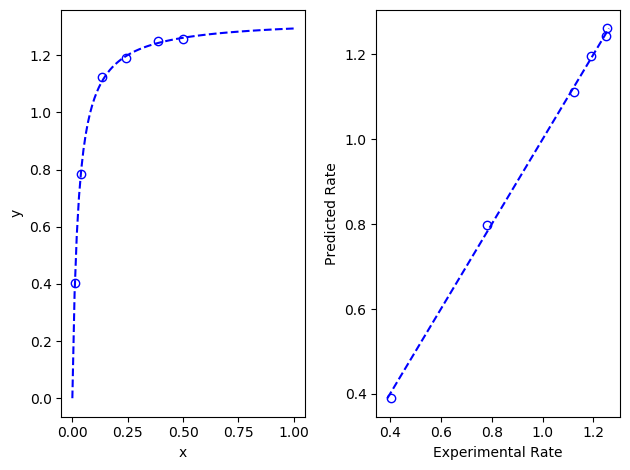

In [9]:
###### Non-linear regression example 1
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t as tdist

###### Data
xexpt = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
yexpt = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

ndpts = len(xexpt)

###### Reaction rates for a full data set given k and several C_j
def model(x,*parameters):
    
    a = parameters[0]
    b = parameters[1]

    return a * x / (b + x)

###### Regression

### Parameter guesses
a_g = 1.2
b_g = 0.03
guess = [a_g,b_g]
npars = len(guess)

### Perform regression
popt,pcov = curve_fit(model,xexpt,yexpt,guess,method='lm')

####### Confidence intervals

### Calculate Student's t value
alpha = 0.05 # 95% confidence interval
dof = ndpts-npars # number of degrees of freedom
tval = tdist.ppf(1.0-alpha/2.0,dof) # student t value for the dof and confidence level

### Confidence interval calculation
sigma = np.sqrt(np.diag(pcov))
ci_half = sigma*tval
ci = np.hstack((popt-ci_half,popt+ci_half))

### Generate matrix of predicted rates and calculate sum of squares
ypredict = model(xexpt,*popt)
sqr_resid = (ypredict-yexpt)**2
ssr = sum(sqr_resid)
print('SSR = ' + "{:.3e}".format(ssr))

### Create output dataframe
param_names = ['a','b']
a,b = popt
soln = pd.DataFrame(popt,index=param_names,columns=['Value'])
soln['95% CI Half Width'] = ci_half
soln['95% CI Half Width Rel %'] = ci_half/popt*100
pd.options.display.float_format = "{:,.3f}".format
print('\n', soln, '\n')

###### Generate wide range of predicted outputs
xfit = np.linspace(0,1,101)
yfit = model(xfit,*popt)

###### Parity line
xparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
yparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
    
###### Plot data
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(xexpt,yexpt,'ob',mfc='none')
ax1.plot(xfit,yfit,'--b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(yexpt,ypredict,'ob',mfc='none')
ax2.plot(xparity,yparity,'--b')
ax2.set_xlabel('Experimental Rate')
ax2.set_ylabel('Predicted Rate')

fig.tight_layout()

plt.show()

## Example 2: given data, one function

In this example, one function is defined that takes in all input data and parameters and then calculates all outputs. The model being used to connect input and output values here is:

$$ r = \frac{\beta_1 \cdot C_B - C_C/\beta_5}{1+\beta_2 \cdot C_A + \beta_3 \cdot C_B + \beta_4 \cdot C_C} $$

SSR = 2.989e-01

     Value  95% CI Half Width  95% CI Half Width Rel %
b1  1.253              2.000                  159.633
b2  0.063              0.100                  160.033
b3  0.040              0.071                  177.858
b4  0.112              0.173                  154.188
b5  1.191              1.929                  161.948 



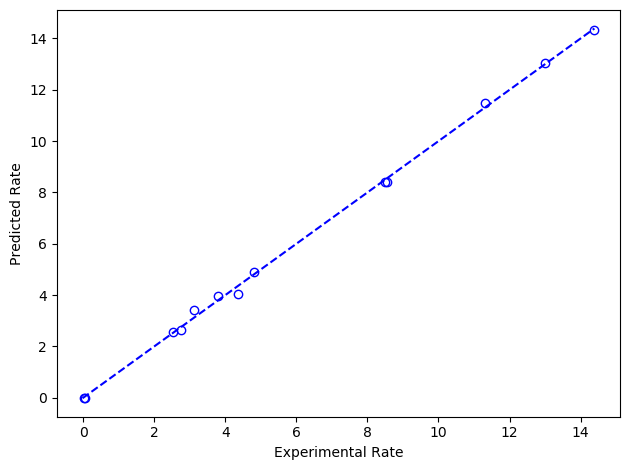

In [10]:
###### Non-linear regression example 1
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t as tdist

###### Data
rate_expt = [8.55,3.79,4.82,0.02,2.75,14.39,2.54,4.35,13,8.5,0.05,11.32,3.13]
CA_expt   = [470,285,470,470,470,100,100,470,100,100,100,285,285]
CB_expt   = [300,80,300,80,80,190,80,190,300,300,80,300,190]
CC_expt   = [10,10,120,120,10,10,65,65,54,120,120,10,120]

ndpts = len(rate_expt)

###### Reaction rates for a full data set given k and several C_j
def model(x,*parameters):
    
    ### Independent variables
    CA = x[0,:]
    CB = x[1,:]
    CC = x[2,:]
    ndpts = len(CA)
    
    ### Parameters to be fit          
    b1 = parameters[0]   
    b2 = parameters[1]
    b3 = parameters[2]
    b4 = parameters[3]
    b5 = parameters[4]
    
    rate_model = (b1*CB-CC/b5)/(1+b2*CA+b3*CB+b4*CC)

    return rate_model

###### Regression

### Parameter guesses
b1_g = 1
b2_g = 0.1
b3_g = 0.1
b4_g = 0.1
b5_g = 1
guess = [b1_g,b2_g,b3_g,b4_g,b5_g]
npars = len(guess)

### Perform regression
xvars = np.array([CA_expt,CB_expt,CC_expt])
yexpt = rate_expt

popt,pcov = curve_fit(model,xvars,yexpt,guess,method='lm')

####### Confidence intervals

### Calculate Student's t value
alpha = 0.05 # 95% confidence interval
dof = ndpts-npars # number of degrees of freedom
tval = tdist.ppf(1.0-alpha/2.0,dof) # student t value for the dof and confidence level

### Confidence interval calculation
sigma = np.sqrt(np.diag(pcov))
ci_half = sigma*tval
ci = np.hstack((popt-ci_half,popt+ci_half))

### Generate matrix of predicted rates and calculate sum of squares
ypredict = model(xvars,*popt)
sqr_resid = (ypredict-yexpt)**2
ssr = sum(sqr_resid)
print('SSR = ' + "{:.3e}".format(ssr))

### Create output dataframe
param_names = ['b1','b2','b3','b4','b5']
b1,b2,b3,b4,b5 = popt
soln = pd.DataFrame(popt,index=param_names,columns=['Value'])
soln['95% CI Half Width'] = ci_half
soln['95% CI Half Width Rel %'] = ci_half/popt*100
pd.options.display.float_format = "{:,.3f}".format
print('\n', soln, '\n')

###### Parity plots

### Parity line
xparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
yparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
    
### Plot data
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(yexpt,ypredict,'ob',mfc='none')
ax1.plot(xparity,yparity,'--b')
ax1.set_xlabel('Experimental Rate')
ax1.set_ylabel('Predicted Rate')

fig.tight_layout()

plt.show()

## Example 3: given data, staged functions
This example uses the same data and reaction model, but separates the calculation of *all* datapoints from the calculation of *each* datapoint.

**model** takes in all of the experimental inputs and parameters and predicts the outputs for every data point. This is directly called by the curve_fit function.

**ri** calculates the output for a single data point. This can be useful when multiple calculations are required to connect inputs to outputs. One example could require numerical methods to solve systems of algebraic equations for each point, such as with reaction equilibrium and CSTR design. Another example could require numerical methods to solve systems of differential equations, such as with batch reactor and PFR design.

SSR = 2.989e-01

     Value  95% CI Half Width  95% CI Half Width Rel %
b1  1.253              2.000                  159.633
b2  0.063              0.100                  160.033
b3  0.040              0.071                  177.858
b4  0.112              0.173                  154.188
b5  1.191              1.929                  161.948 



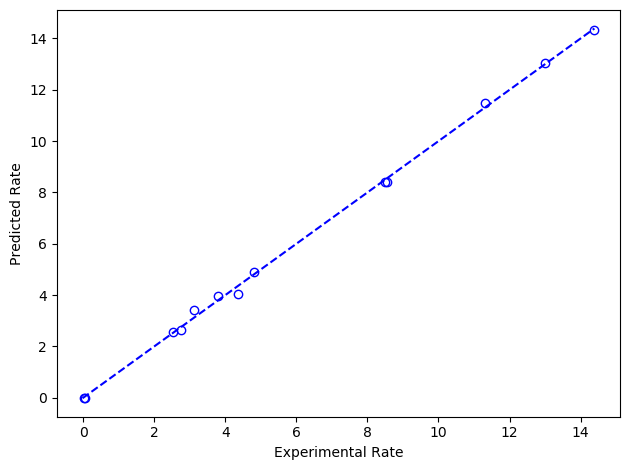

In [11]:
###### Non-linear regression example 2
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t as tdist

###### Data
rate_expt = [8.55,3.79,4.82,0.02,2.75,14.39,2.54,4.35,13,8.5,0.05,11.32,3.13]
CA_expt   = [470,285,470,470,470,100,100,470,100,100,100,285,285]
CB_expt   = [300,80,300,80,80,190,80,190,300,300,80,300,190]
CC_expt   = [10,10,120,120,10,10,65,65,54,120,120,10,120]

ndpts = len(rate_expt)

###### Reaction rate for a given k and a set of C_j
def ri(x,*parameters):
    
    CA = x[0]
    CB = x[1]
    CC = x[2]
    
    b1 = parameters[0]
    b2 = parameters[1]
    b3 = parameters[2]
    b4 = parameters[3]
    b5 = parameters[4]
    
    r = (b1*CB-CC/b5)/(1+b2*CA+b3*CB+b4*CC)
    
    return r

###### Reaction rates for a full data set given k and several C_j
def model(x,*parameters):
    
    ndpts = len(x[0,:])
    
    ### Calculate output value for each data point based on a model
    rate_model = np.zeros(ndpts)
    for i in range(ndpts):
        rate_model[i] = ri(x[:,i],*parameters)

    return rate_model

###### Regression

### Parameter guesses
b1_g = 1
b2_g = 0.1
b3_g = 0.1
b4_g = 0.1
b5_g = 1
guess = [b1_g,b2_g,b3_g,b4_g,b5_g]
npars = len(guess)

### Perform regression
xvars = np.array([CA_expt,CB_expt,CC_expt])
yexpt = rate_expt

popt,pcov = curve_fit(model,xvars,yexpt,guess,method='lm')

####### Confidence intervals

### Calculate Student's t value
alpha = 0.05 # 95% confidence interval
dof = ndpts-npars # number of degrees of freedom
tval = tdist.ppf(1.0-alpha/2.0,dof) # student t value for the dof and confidence level

### Confidence interval calculation
sigma = np.sqrt(np.diag(pcov))
ci_half = sigma*tval
ci = np.hstack((popt-ci_half,popt+ci_half))

### Generate matrix of predicted rates and calculate sum of squares
ypredict = model(xvars,*popt)
sqr_resid = (ypredict-yexpt)**2
ssr = sum(sqr_resid)
print('SSR = ' + "{:.3e}".format(ssr))

### Create output dataframe
param_names = ['b1','b2','b3','b4','b5']
b1,b2,b3,b4,b5 = popt
soln = pd.DataFrame(popt,index=param_names,columns=['Value'])
soln['95% CI Half Width'] = ci_half
soln['95% CI Half Width Rel %'] = ci_half/popt*100
pd.options.display.float_format = "{:,.3f}".format
print('\n', soln, '\n')

###### Parity plots

### Parity line
xparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
yparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
    
### Plot data
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(yexpt,ypredict,'ob',mfc='none')
ax1.plot(xparity,yparity,'--b')
ax1.set_xlabel('Experimental Rate')
ax1.set_ylabel('Predicted Rate')

fig.tight_layout()

plt.show()

## Example 4: generating and fitting data


 True rate = 
 [0.16666667 0.66666667 1.5        2.66666667 0.16666667 0.16666667
 0.16666667 0.1        0.07142857 0.05555556]

 Experimental rate =
 [0.15870318 0.63232651 1.38868574 2.41647969 0.15716201 0.17954889
 0.15942133 0.09939017 0.0731811  0.05827435]

 SSR = 1.862e-02

    Value  95% CI Half Width  95% CI Half Width Rel %
k  0.385              0.088                   22.950
K  1.418              0.494                   34.870 



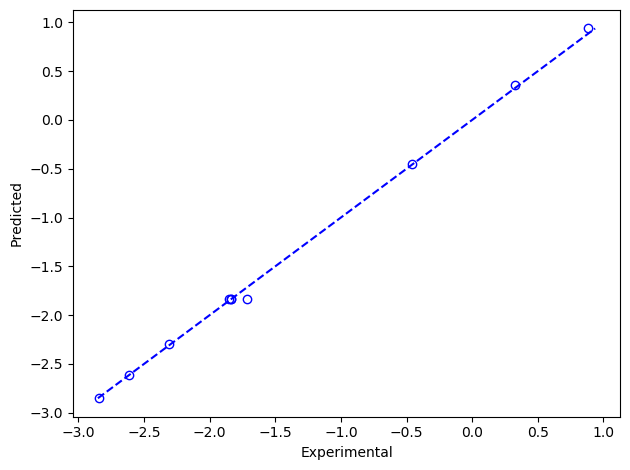

In [12]:
###### Non-linear regression example 3

%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t as tdist

def ri(x,*parameters):
    
    ### Independent variables
    C_E = x[0]
    C_B = x[1]
    C_W = x[2]
    
    ### Parameters to be fit          
    k = parameters[0]   
    K = parameters[1]
    
    r = k * C_E**2 / (1 + K * C_W)
    
    return r

def initial_rate_model(x,*parameters):
    
    ### Independent variables
    C_E_0 = x[0,:]
    C_B_0 = x[1,:]
    C_W_0 = x[2,:]
    ndpts = len(C_E_0)
    
    ### Parameters to be fit          
    k = parameters[0]   
    K = parameters[1]
    
    ### Calculate output value for each data point based on a model
    rate_model = np.zeros(ndpts)
    for i in range(ndpts):      
        rate_model[i] = ri(x[:,i],k,K)
    return rate_model

def log_initial_rate_model(x,*parameters):
    
    ### Independent variables
    C_E_0 = x[0,:]
    C_B_0 = x[1,:]
    C_W_0 = x[2,:]
    ndpts = len(C_E_0)
    
    ### Parameters to be fit          
    k = parameters[0]   
    K = parameters[1]
    
    ### Calculate output value for each data point based on a model
    rate_model = np.zeros(ndpts)
    for i in range(ndpts):      
        rate_model[i] = ri(x[:,i],k,K)
    return np.log(rate_model)

###### Generate a dataset with error

### Initial concentrations
C_E_0_expt = np.array([1.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0])
C_B_0_expt = np.array([1.0,1.0,1.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0])
C_W_0_expt = np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0])
ndpts = len(C_E_0_expt)

xexpt = np.array([C_E_0_expt,C_B_0_expt,C_W_0_expt])

### Calculate expected rate for given parameter set
k_actual = 0.5
K_actual = 2.0

parameters=[k_actual,K_actual]

rate_true = initial_rate_model(xexpt,*parameters)
print('\n True rate = \n',rate_true)

random_error = 2*(np.random.rand(ndpts)-0.5)/10+1 # +/- 5% random error
rate_expt = rate_true * random_error
#rate_expt = [0.15180133,0.64136726,1.38892509,2.75117726,0.16706375,0.15192908,0.15336446,0.10236551,0.06573618,0.06004724]
print('\n Experimental rate =\n',rate_expt)

####### Fit noisy data

### Parameter guesses
k_g = 1
K_g = 1

guess = [k_g,K_g]

npars = len(guess)

### Perform regression
xexpt = np.array([C_E_0_expt,C_B_0_expt,C_W_0_expt])
yexpt = np.log(rate_expt)
popt,pcov = curve_fit(log_initial_rate_model,xexpt,yexpt,guess,method='lm')

####### Confidence intervals

### Calculate Student's t value
alpha = 0.05 # 95% confidence interval
dof = ndpts-npars # number of degrees of freedom
tval = tdist.ppf(1.0-alpha/2.0,dof) # student t value for the dof and confidence level

### Confidence interval calculation
sigma = np.sqrt(np.diag(pcov))
ci_half = sigma*tval
ci = np.hstack((popt-ci_half,popt+ci_half))

### Generate matrix of predicted rates and calculate sum of squares
ypredict = log_initial_rate_model(xexpt,*popt)
sqr_resid = (yexpt-ypredict)**2
ssr = sum(sqr_resid)
print('\n SSR = ' + "{:.3e}".format(ssr))

### Create output dataframe
param_names = ['k','K']
k,K = popt
soln = pd.DataFrame(popt,index=param_names,columns=['Value'])
soln['95% CI Half Width'] = ci_half
soln['95% CI Half Width Rel %'] = ci_half/popt*100
pd.options.display.float_format = "{:,.3f}".format
print('\n', soln, '\n')

###### Parity plots

### Parity line
xparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
yparity = [min([min(yexpt),min(ypredict)]),max([max(yexpt),max(ypredict)])]
    
### Plot data
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(yexpt,ypredict,'ob',mfc='none')
ax1.plot(xparity,yparity,'--b')
ax1.set_xlabel('Experimental')
ax1.set_ylabel('Predicted')

fig.tight_layout()

plt.show()
